在逻辑回归中，选择正则化，参数为 `penalty`。

参考资料：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [3]:
cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [4]:
'data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
    X.shape, y[y == 1].shape[0], y[y == 0].shape[0])

'data shape: (569, 30); no. positive: 357; no. negative: 212'

In [5]:
import pandas as pd

data = pd.DataFrame(cancer.data)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 模型训练

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [9]:
'train score: {train_score:.6f}; test score: {test_score:.6f}'.format(train_score=train_score, test_score=test_score)

'train score: 0.962637; test score: 0.956140'

In [10]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1])

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.956140350877193

## 预测概率

In [12]:
np.set_printoptions(precision=4, suppress=True)

In [13]:
y_pred_proba = model.predict_proba(X_test)

pd.set_option('precision', 2)  # n 是要显示的精度，应该是一个整数
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
pd.DataFrame(y_pred_proba, columns=['predict = 0', 'predict = 1'])

,predict = 0,predict = 1
0,0.1123,0.8877
1,0.0018,0.9982
2,0.0012,0.9988
3,0.0529,0.9471
4,0.9998,0.0002
5,0.0017,0.9983
6,0.4770,0.5230
7,0.0004,0.9996
8,0.0035,0.9965
9,0.0000,1.0000


下面这些样本预测的把握程度不高。

In [14]:
y_pred_proba_0 = y_pred_proba[:, 0] > 0.1
result = y_pred_proba[y_pred_proba_0]

y_pred_proba_1 = result[:, 1] > 0.1
print(result[y_pred_proba_1])

[[0.1123 0.8877]
 [0.477  0.523 ]
 [0.4097 0.5903]
 [0.1901 0.8099]
 [0.7549 0.2451]
 [0.7671 0.2329]
 [0.79   0.21  ]
 [0.139  0.861 ]
 [0.7474 0.2526]
 [0.1682 0.8318]
 [0.5816 0.4184]
 [0.1023 0.8977]]


## 模型优化

+ 增加多项式特征，**不要忘记归一化**。

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


# 增加多项式预处理
def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

In [16]:
model = polynomial_model(degree=2, penalty='l1', solver='liblinear')

model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('logistic_regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [17]:
train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('train_score: {0:0.6f}; cv_score: {1:.6f}'.format(train_score, cv_score))

train_score: 1.000000; cv_score: 0.973684


### 从 Pipeline 中获得子模型

In [18]:
logistic_regression = model.named_steps['logistic_regression']

In [19]:
print('model parameters shape: {0}; count of non-zero element: {1}'.format(
    logistic_regression.coef_.shape,
    np.count_nonzero(logistic_regression.coef_)))

model parameters shape: (1, 495); count of non-zero element: 87


In [20]:
import sklearn

sklearn.__version__

'0.20.3'

**如果 solver 使用 saga 在这个问题上效果并不好。**

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the

CPU times: user 29.4 s, sys: 4.85 s, total: 34.3 s
Wall time: 13.3 s


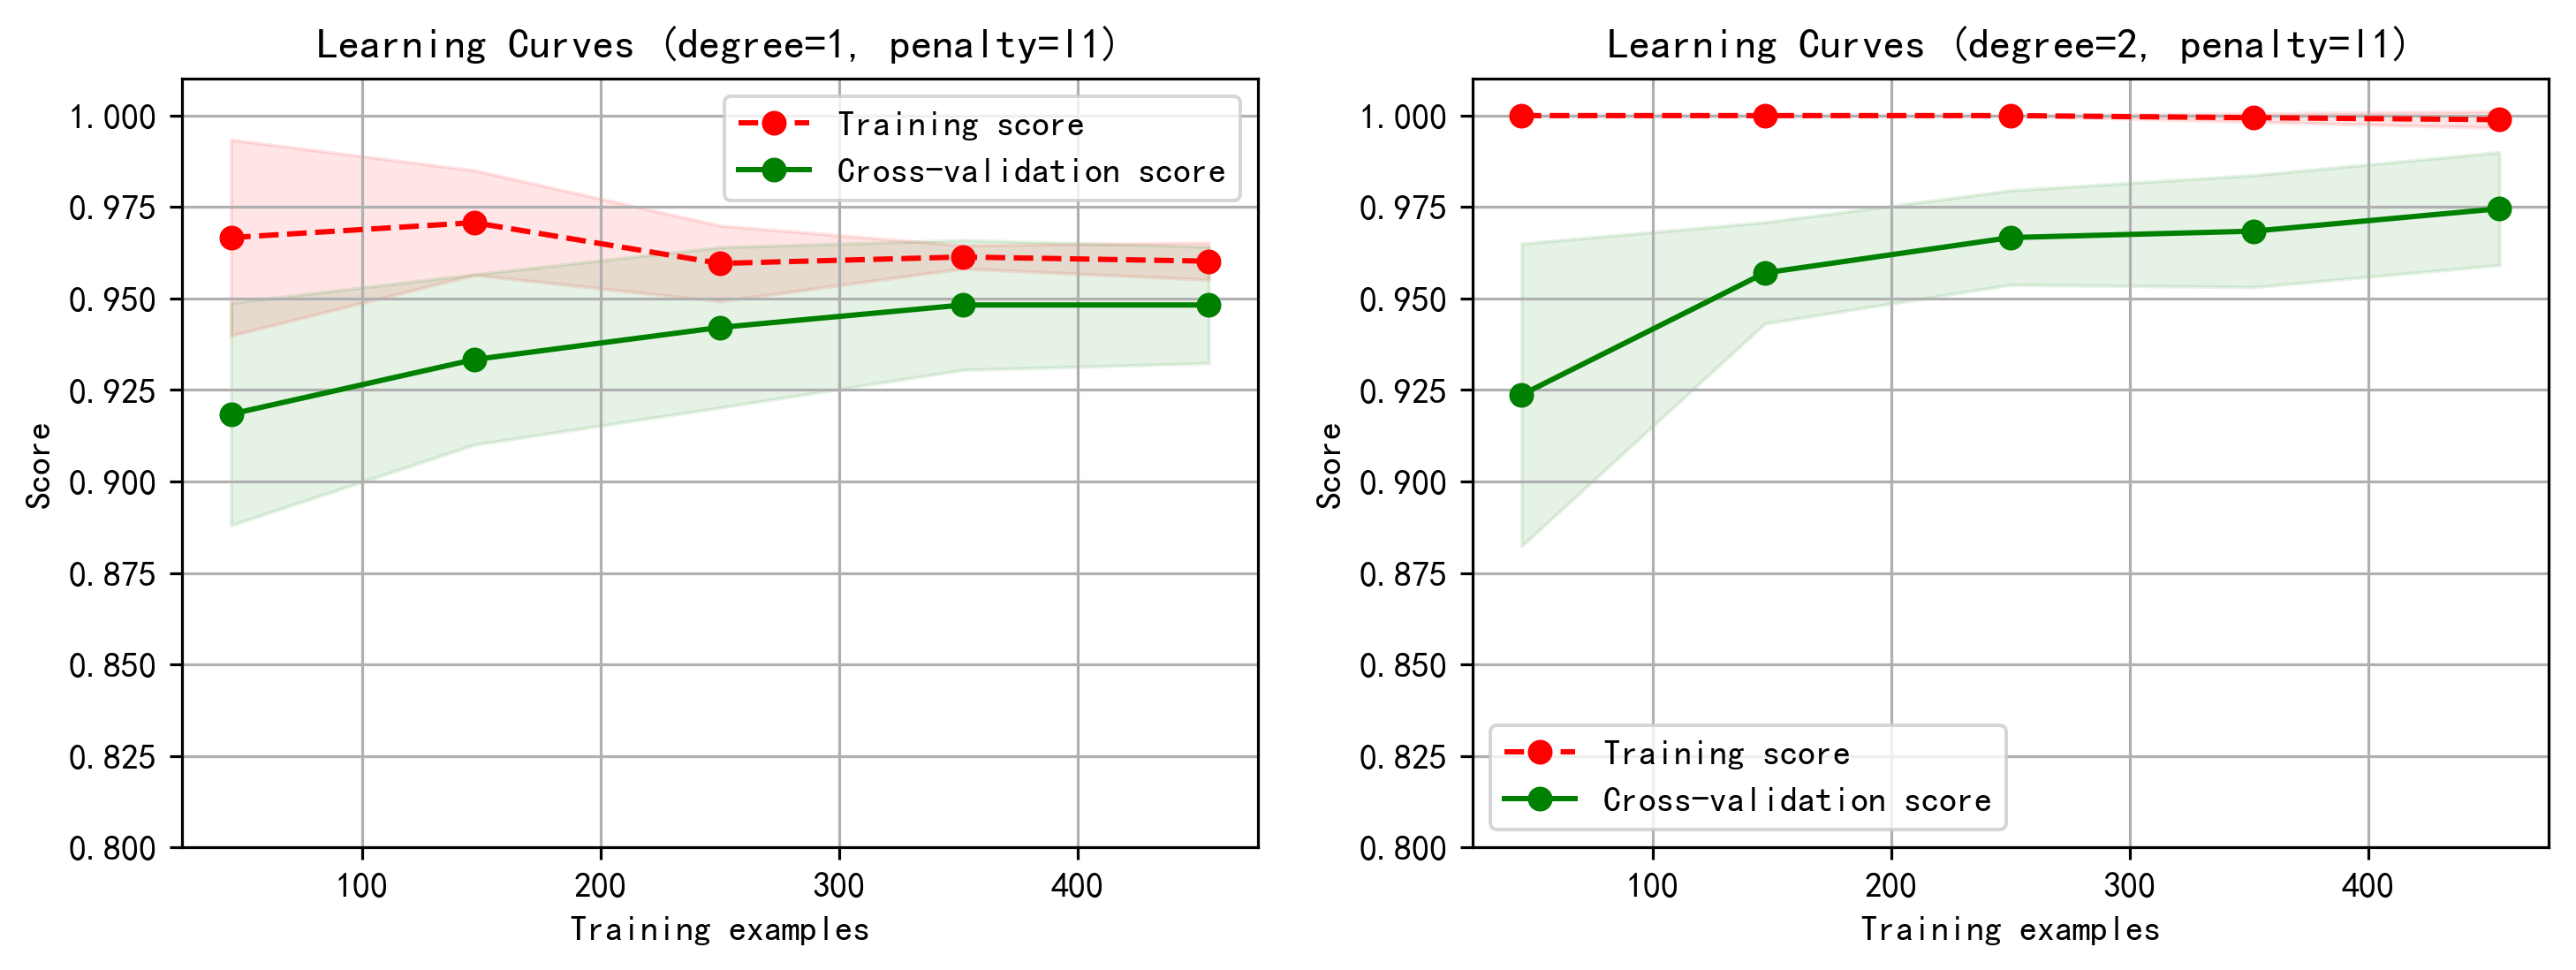

In [21]:
%%time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves (degree={0}, penalty={1})'
degrees = [1, 2]
penalty = 'l1'

plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(
        plt,
        polynomial_model(
            degree=degrees[i], penalty=penalty, solver='liblinear'),
        title.format(degrees[i], penalty),
        X,
        y,
        ylim=(0.8, 1.01),
        cv=cv)

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: new

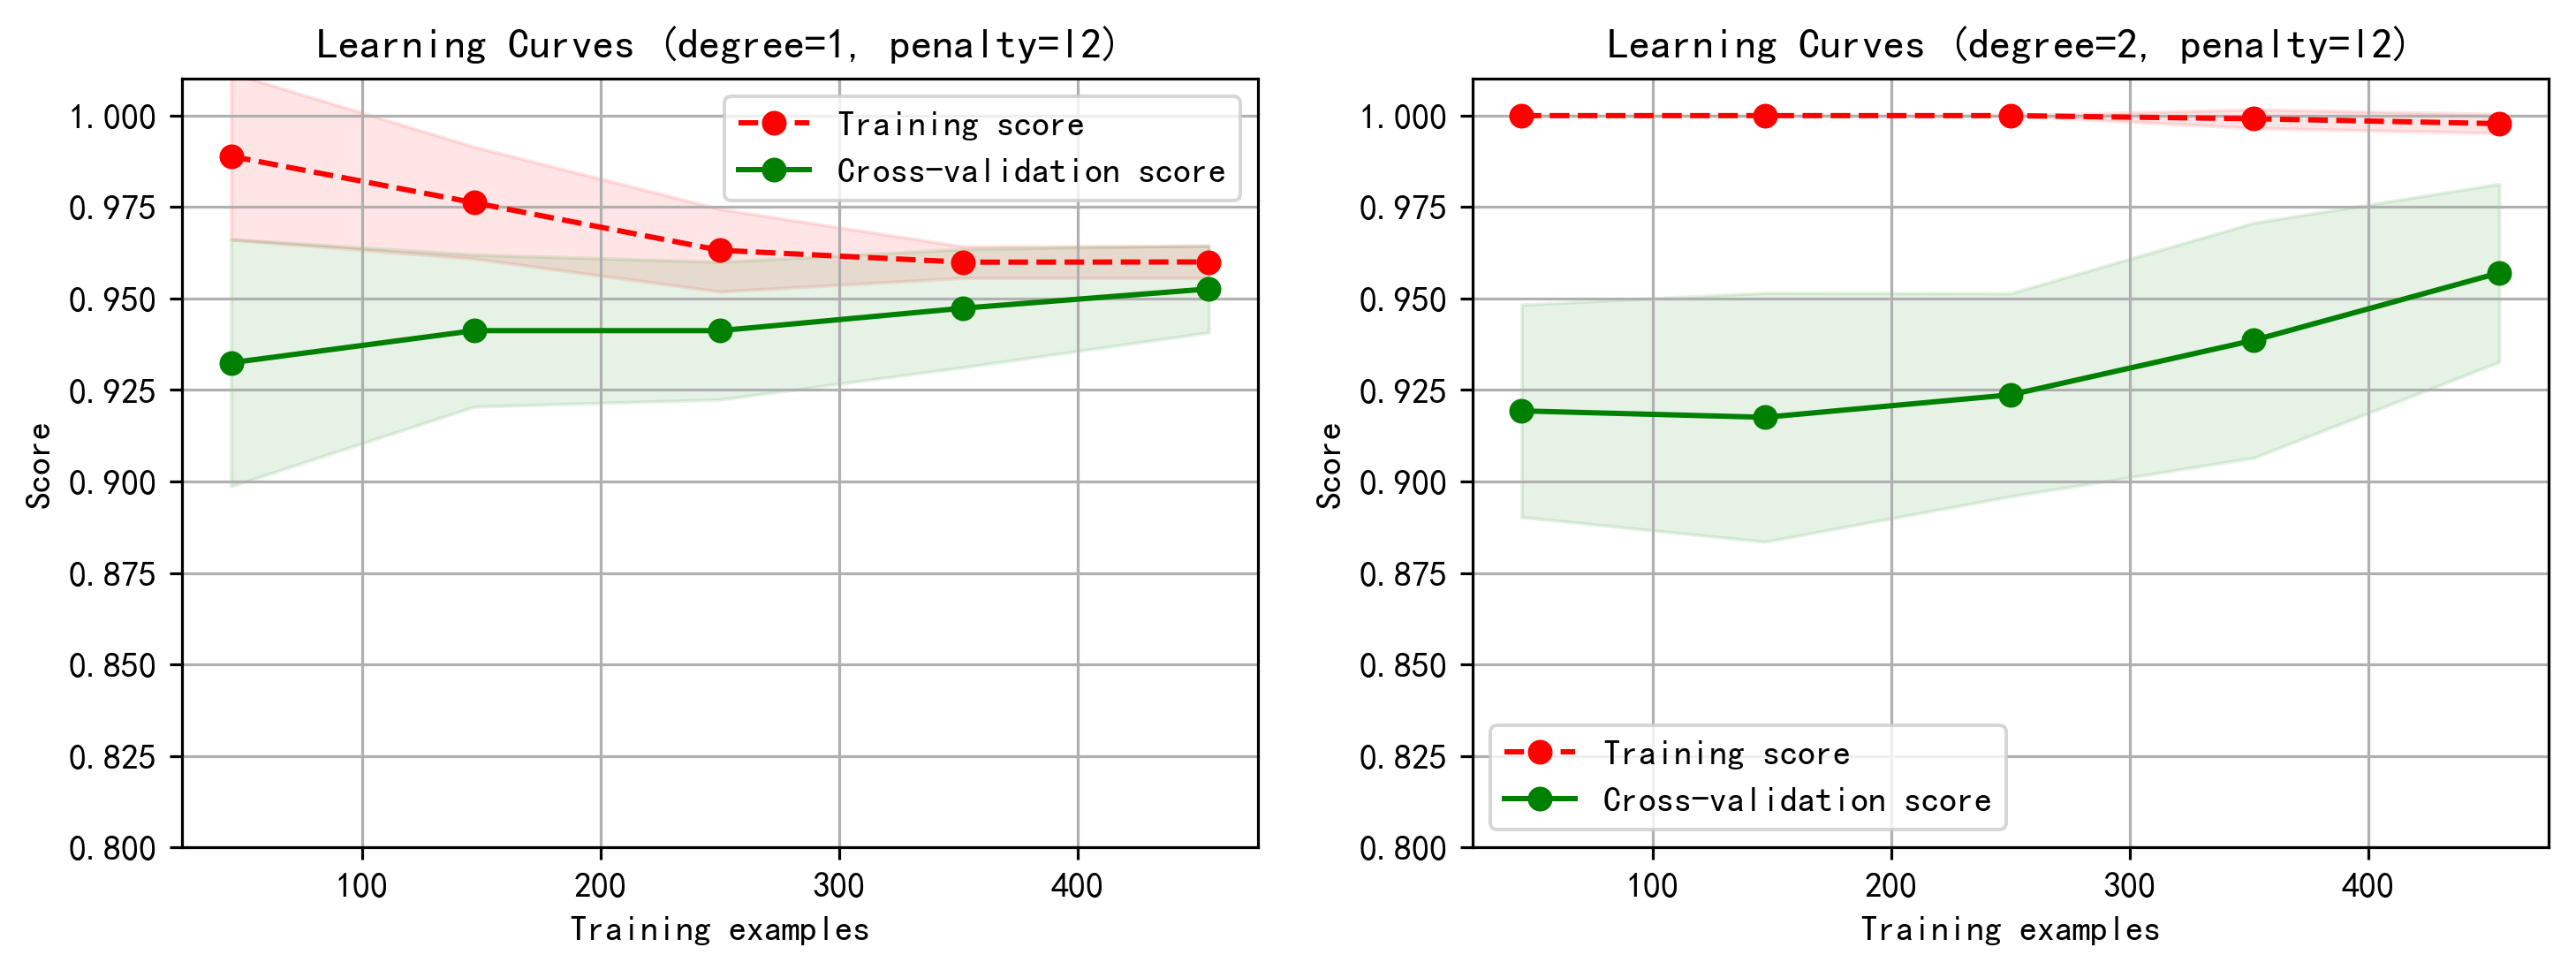

In [22]:
penalty = 'l2'

plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(
        plt,
        polynomial_model(degree=degrees[i], penalty=penalty, solver='newton-cg'),
        title.format(degrees[i], penalty),
        X,
        y,
        ylim=(0.8, 1.01),
        cv=cv)